# Carga y unión de los datos

In [706]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [707]:
# Cargar los datasets
df_arbrat = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_2025.csv', encoding='utf-8')
df_parcs = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_parcs.csv', encoding='utf-8')
df_zones = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_zones.csv', encoding='utf-8')

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\2811239385.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_parcs = pd.read_csv(r'C:\Users\carlo\Documentos\proyectos\arbrat\data\raw\arbrat_parcs.csv', encoding='utf-8')


In [708]:
# Mostrar las primeras filas de cada dataset
print("🔍 Columnas en arbrat_2025:")
print(df_arbrat.info(), "\n")

print("📌 arbrat_2025.csv")
print(df_arbrat.head(), "\n")

🔍 Columnas en arbrat_2025:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146901 entries, 0 to 146900
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   codi               146901 non-null  object 
 1   x_etrs89           146901 non-null  float64
 2   y_etrs89           146901 non-null  float64
 3   latitud            146901 non-null  float64
 4   longitud           146901 non-null  float64
 5   tipus_element      146901 non-null  object 
 6   espai_verd         31033 non-null   object 
 7   adreca             146901 non-null  object 
 8   cat_especie_id     146901 non-null  int64  
 9   cat_nom_cientific  146901 non-null  object 
 10  cat_nom_castella   144079 non-null  object 
 11  cat_nom_catala     143852 non-null  object 
 12  categoria_arbrat   146844 non-null  object 
 13  data_plantacio     29387 non-null   object 
 14  tipus_aigua        6724 non-null    object 
 15  tipus_reg          14689

In [709]:
print("🔍 Columnas en arbrat_parcs:")
print(df_parcs.info(), "\n")

print("📌 arbrat_parcs.csv")
print(df_parcs.head(), "\n")


🔍 Columnas en arbrat_parcs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34357 entries, 0 to 34356
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codi               34357 non-null  object 
 1   x_etrs89           34357 non-null  float64
 2   y_etrs89           34357 non-null  float64
 3   latitud            34357 non-null  float64
 4   longitud           34357 non-null  float64
 5   tipus_element      34357 non-null  object 
 6   espai_verd         34239 non-null  object 
 7   adreca             34357 non-null  object 
 8   cat_especie_id     34357 non-null  int64  
 9   cat_nom_cientific  34357 non-null  object 
 10  cat_nom_castella   34023 non-null  object 
 11  cat_nom_catala     33996 non-null  object 
 12  categoria_arbrat   34306 non-null  object 
 13  data_plantacio     1295 non-null   object 
 14  tipus_aigua        697 non-null    object 
 15  tipus_reg          34349 non-null  object 

In [710]:
print("🔍 Columnas en arbrat_zones:")
print(df_zones.info(), "\n")
print("📌 arbrat_zones.csv")
print(df_zones.head(), "\n")


🔍 Columnas en arbrat_zones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43043 entries, 0 to 43042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codi               43043 non-null  object 
 1   x_etrs89           43043 non-null  float64
 2   y_etrs89           43043 non-null  float64
 3   latitud            43043 non-null  float64
 4   longitud           43043 non-null  float64
 5   tipus_element      43043 non-null  object 
 6   espai_verd         40522 non-null  object 
 7   adreca             43043 non-null  object 
 8   cat_especie_id     43043 non-null  int64  
 9   cat_nom_cientific  43043 non-null  object 
 10  cat_nom_castella   42267 non-null  object 
 11  cat_nom_catala     42208 non-null  object 
 12  categoria_arbrat   42991 non-null  object 
 13  data_plantacio     3838 non-null   object 
 14  tipus_aigua        2903 non-null   object 
 15  tipus_reg          43019 non-null  object 

In [711]:
# Comprobamos si tienen columnas similares
print("Columnas en arbrat_2025:", df_arbrat.columns.tolist())
print("Columnas en arbrat_parcs:", df_parcs.columns.tolist())

# Si coinciden, concatenamos
df_union = pd.concat([df_arbrat, df_parcs], ignore_index=True)

# Eliminamos duplicados basándonos únicamente en la columna 'codi'
df_union = df_union.drop_duplicates(subset=['codi'])

print("Total de registros combinados sin duplicados:", len(df_union))


Columnas en arbrat_2025: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Columnas en arbrat_parcs: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Total de registros combinados sin duplicados: 181193


In [712]:
# Comprobamos si tienen columnas similares
print("Columnas en df_union:", df_union.columns.tolist())
print("Columnas en arbrat_zones:", df_zones.columns.tolist())

# Si coinciden, concatenamos
df_final = pd.concat([df_union, df_zones], ignore_index=True)

# Eliminamos duplicados basándonos únicamente en la columna 'codi'
df_final = df_final.drop_duplicates(subset=['codi'])

print("Total de registros combinados sin duplicados:", len(df_final))


Columnas en df_union: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Columnas en arbrat_zones: ['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte']
Total de registros combinados sin duplicados: 224171


In [713]:
df_final.head().sort_index(ascending=True)

,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,cat_nom_castella,cat_nom_catala,categoria_arbrat,data_plantacio,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',-,-,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',-,-,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,Plátano,Plàtan,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,Plátano,Plàtan,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,Plátano,Plàtan,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ


In [714]:
df_final.columns

Index(['codi', 'x_etrs89', 'y_etrs89', 'latitud', 'longitud', 'tipus_element', 'espai_verd', 'adreca', 'cat_especie_id', 'cat_nom_cientific', 'cat_nom_castella', 'cat_nom_catala', 'categoria_arbrat', 'data_plantacio', 'tipus_aigua', 'tipus_reg', 'geom', 'catalogacio', 'codi_barri', 'nom_barri', 'codi_districte', 'nom_districte'], dtype='object')

In [715]:
df_arbres = df_final.copy()

In [716]:
import os

# Crear la carpeta 'clean' si no existe
clean_folder = r'C:\Users\carlo\Documentos\proyectos\arbrat\data\clean'
os.makedirs(clean_folder, exist_ok=True)

# Exportar el DataFrame a archivos CSV
try:
    df_final.to_csv(os.path.join(clean_folder, 'arbres_clean.csv'), index=False, encoding='utf-8')
except PermissionError:
    print("El archivo ya existe o está siendo utilizado. Ignorando la operación.")

# Análisis Exploratorio

In [717]:
df = df_arbres

## Tratamiento de valores nulos

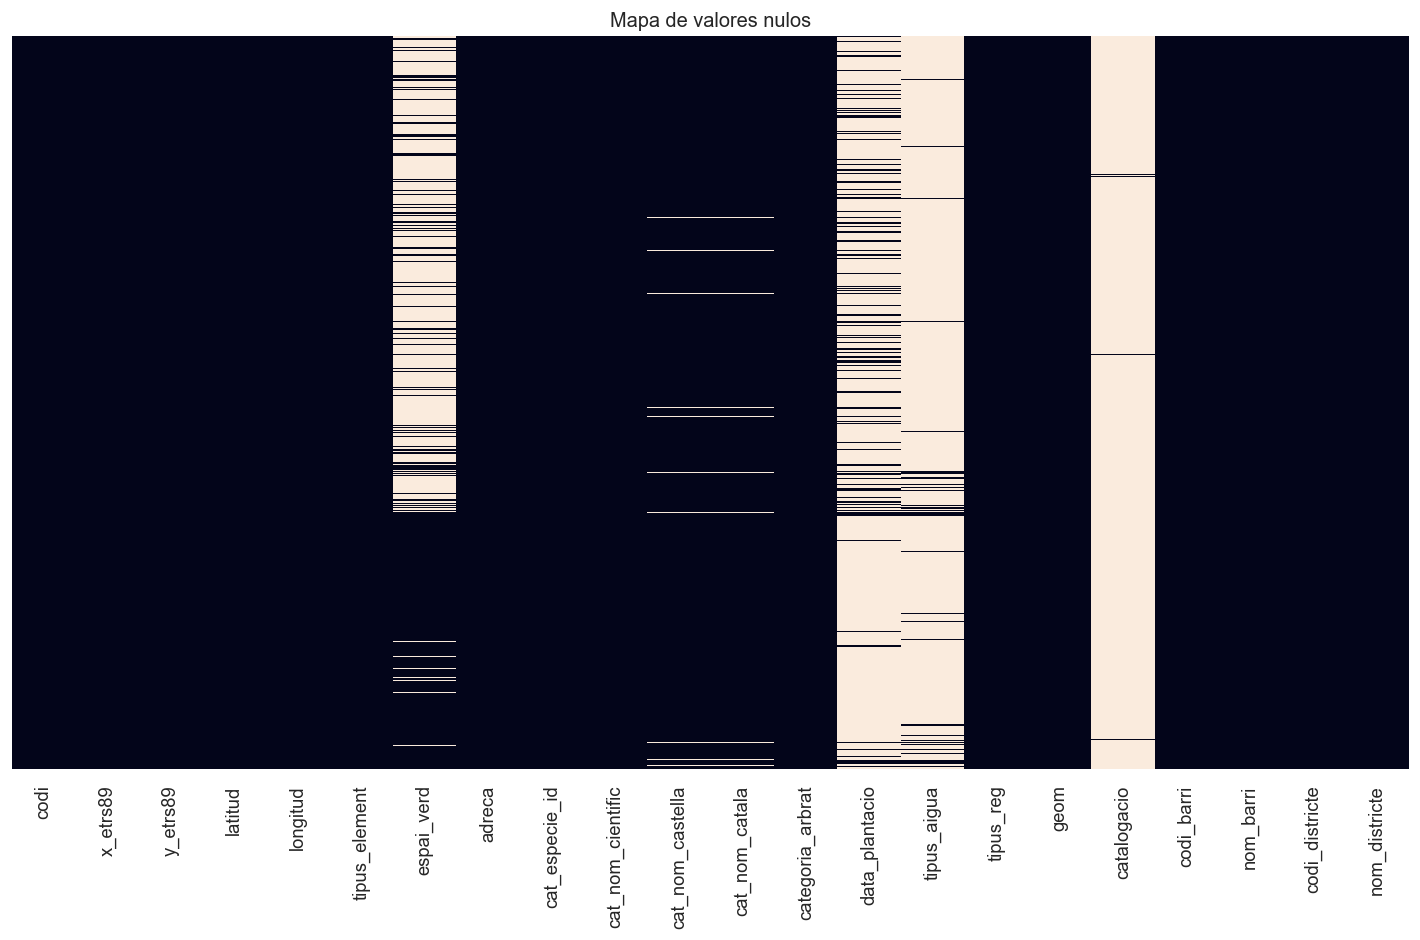

codi                      0
x_etrs89                  0
y_etrs89                  0
latitud                   0
longitud                  0
tipus_element             0
espai_verd           118449
adreca                    0
cat_especie_id            0
cat_nom_cientific         0
cat_nom_castella       3932
cat_nom_catala         4245
categoria_arbrat         64
data_plantacio       189661
tipus_aigua          213847
tipus_reg                25
geom                      0
catalogacio          223025
codi_barri               15
nom_barri                15
codi_districte            5
nom_districte             5
dtype: int64


In [718]:
# Visualización de valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos')
plt.tight_layout()
plt.show()

print(df.isnull().sum())

### Nulos espai_verd

In [719]:
print(f"Nulos iniciales en espai_verd:{df.espai_verd.isna().sum()} de {len(df)} ({df.espai_verd.isna().mean()*100:.1f}%)")
# Crear una nueva columna 'es_espai_verd' que indique si 'espai_verd' es NaN
df['es_espai_verd'] = df['espai_verd'].apply(lambda x: False if x == "NaN" else True)

Nulos iniciales en espai_verd:118449 de 224171 (52.8%)


In [720]:
# Visualizar los primeros 10 valores únicos de la columna 'espai_verd'
print("Primeros 10 valores únicos en 'espai_verd':")
print(df.espai_verd.unique()[:10])

Primeros 10 valores únicos en 'espai_verd':
['Central de Nou Barris, Parc'
 'Valldaura, Pg. (Llucmajor, Pl. - Fabra i Puig, Pl.)'
 'Constància, Jardins ' '30 (Llull, c. (Diagonal, Av. - Prim, Rbla.))'
 'Aragó, c. - Enamorats, c. - Dos de Maig, c.'
 "Roma, Av. (Vikladomat, c. - Comte d'Urgell, c.)"
 'Aragó, c. - Enamorats, c. - Castillejos, c.'
 'Reis Catòlics davant,  17, c. (Associació Veïns Vallvidrera)'
 'General Mitre, Rda.' 'Doctor Fleming, c. -General Mitre, Rda.']


Como parece que espai_verd se refiere a plazas o espacios con un conjunto de árboles, primero miramos de rellenar algunos nulos en base a direcciones que coincidan. Es decir, si la columna "adreça" tiene un árbol en la dirección X que corresponde al espai verd Y, si hay otro árbol en esa misma dirección, debe corresponder al mismo espacio verde. 

In [721]:
# Rellenar los valores nulos en 'espai_verd' basándose en coincidencias en la columna 'adreca'
df['espai_verd'] = df.groupby('adreca')['espai_verd'].transform(lambda x: x.ffill().bfill())

print(f"Nulos en espai_verd después de rellenar con las coincidencias por dirección: {df.espai_verd.isna().sum()} de {len(df)} ({df.espai_verd.isna().mean()*100:.1f}%)")

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\377941552.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['espai_verd'] = df.groupby('adreca')['espai_verd'].transform(lambda x: x.ffill().bfill())


Nulos en espai_verd después de rellenar con las coincidencias por dirección: 97050 de 224171 (43.3%)


Finalmente, consideramos que los restantes se refieren a que no forman parte de ninguno de estos espacios, por lo que son árboles sueltos en la via pública u otros, y le damos el valor de "cap" (ninguno), para dejar el campo sin nulos.

In [722]:
df['espai_verd'].fillna('Cap', inplace=True)
print(f"Nulos finales en espai_verd: {df.espai_verd.isna().sum()} de {len(df)} ({df.espai_verd.isna().mean()*100:.1f}%)")

Nulos finales en espai_verd: 0 de 224171 (0.0%)


C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\3725834150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['espai_verd'].fillna('Cap', inplace=True)


### Nulos cat_nom_catala

In [723]:
# Visualizar los primeros 10 valores únicos de la columna 'cat_nom_catala'
print("Primeros 10 valores únicos en 'cat_nom_catala':")
print(df.cat_nom_catala.unique()[:10])
# Detectamos los valores únicos en 'cat_nom_catala' y vemos que hay algunos que no son válidos ("-")

Primeros 10 valores únicos en 'cat_nom_catala':
['-' 'Plàtan' 'Pi pinyoner; pi pinyer'
 'Palmera de Canaries; palmera de Canàries' 'Pollancre gavatx' nan
 'Pi blanc' 'server' 'Tipuana' 'Acàcia del Japó']


In [724]:
# Vemos a qué 'cat_nom_cientific' corresponde el valor "-":

# Filtrar las filas donde cat_nom_catala es '-'
cat_nom_cientific_correspondiente = df[df['cat_nom_catala'] == '-']['cat_nom_cientific'].unique()

# Mostrar los valores únicos de cat_nom_cientific
print("cat_nom_cientific correspondiente a '-':", cat_nom_cientific_correspondiente)

cat_nom_cientific correspondiente a '-': ["Fraxinus angustifolia 'Raywood'" "Magnolia grandiflora 'Gallisoniensis'"
 "Pyrus calleryana 'Chanticleer'" "Morus alba 'Fruitless'"
 "Quercus robur 'Fastigiata'" "Robinia pseudoacacia 'Pyramidalis'"
 "Styphnolobium japonicum 'Columnare'" "Ligustrum japonicum 'Texanum'"
 "Cupressus sempervirens 'stricta'" "Ulmus minor 'Umbraculifera'"
 "Robinia pseudoacacia 'Umbraculifera'" "Prunus cerasifera 'Nigra'"
 "Hesperocyparis macrocarpa 'Compacta'" "Ligustrum japonicum 'Variegatum'"
 "Morus alba 'Multicaulis'" "Laurus nobilis 'Crispa'"
 "Malus x moerlandsii 'Liset'" "Ligustrum lucidum 'Aureovariegatum'"
 'Ficus rubiginosa f. glabrescens' "Picea × albertiana 'Conica'"
 "Ficus elastica 'Decora Rubra'" 'Brachychiton populneus subsp. trilobus'
 "Ficus binnendykii 'Alii'" "Robinia pseudoacacia 'Microphylla'"
 "Malus x zumi 'Golden Hornet'"]


In [725]:
# Contar valores nulos en 'cat_nom_catala'
nulos_cat_nom_catala = df['cat_nom_catala'].isna().sum()
print(f"Valores nulos en cat_nom_catala: {nulos_cat_nom_catala}")

# Contar valores iguales a '-'
valores_guion = (df['cat_nom_catala'] == '-').sum()
print(f"Valores '-' en cat_nom_catala: {valores_guion}")

Valores nulos en cat_nom_catala: 4245
Valores '-' en cat_nom_catala: 5577


In [726]:
# Reemplazar los valores "-" en 'cat_nom_catala' por NaN
df_arbres['cat_nom_catala'].replace('-', np.nan, inplace=True)

# Rellenar los valores nulos en 'cat_nom_catala' basándose en coincidencias en la columna 'cat_nom_cientific'
df['cat_nom_catala'] = df.groupby('cat_nom_cientific')['cat_nom_catala'].transform(lambda x: x.ffill().bfill())

print(f"No hay nombre en catalán en {df.cat_nom_catala.isna().sum()} de {len(df)} registros ({df.cat_nom_catala.isna().mean()*100:.1f}%)")

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\3545972026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_arbres['cat_nom_catala'].replace('-', np.nan, inplace=True)
C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\3545972026.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cat_nom_catala'] = df

No hay nombre en catalán en 9822 de 224171 registros (4.4%)


In [727]:
# Filtrar valores no nulos y convertir a cadenas
sorted_cat_nom_catala = sorted(df['cat_nom_catala'].dropna().astype(str).unique().tolist())
print(sorted_cat_nom_catala)

['Acacia taparera', "Acàcia blanca 'Frisia'", 'Acàcia borda; robínia', 'Acàcia de flor vermella', 'Acàcia del Japó', 'Acàcia platejada; Mimosa de tot temps', 'Acàcia taperera', 'Acàcia taperera Summer Chocolate', 'Acàcia tres punxes', 'Acàcia tres punxes; acàcia de tres punxes', 'Acàcia verticil·lada', 'Advocater; alvocater', 'Ailant', 'Aladern', 'Aladern, olivereta; aladern de fulla estreta', 'Albena', 'Albercoquer', 'Alzina', 'Ametller', 'Aranyoner', 'Araucària columnar', 'Araucària de Bidwill; Araucaria australiana', 'Arboç', 'Arbre ampolla', 'Arbre botella de Queensland', 'Arbre de Júpiter', 'Arbre de ferro', "Arbre de l'amor de flor blanca", "Arbre de l'amor de flor rosa", "Arbre de l'amor; Arbre de Judas", "Arbre de l'oli de ben", 'Arbre de la vida', 'Arbre de la vida; tuia del Canadà', 'Arbre de les perruques; fustet', 'Arbre de les tulipes; tuliper de Virgínia', 'Arbre de pisos', 'Arbre del cautxú; ficus de cautxú', 'Arbre del coral; eritrina cresta de gall', 'Arbre del paradís

### Nulos cat_nom_castella

In [728]:
print(f"Nulos iniciales en cat_nom_castella: {df.cat_nom_castella.isna().sum()} de {len(df)}")
print(f"Valores '-' en cat_nom_castella: {(df.cat_nom_castella == '-').sum()} de {len(df)}")

Nulos iniciales en cat_nom_castella: 3932 de 224171
Valores '-' en cat_nom_castella: 5577 de 224171


In [729]:
# Cambiar también los valores "-" a NaN en cat_nom_castella
df_arbres['cat_nom_castella'].replace('-', np.nan, inplace=True)


C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1584393154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_arbres['cat_nom_castella'].replace('-', np.nan, inplace=True)


In [730]:
# Rellenar los valores nulos en 'cat_nom_castella' basándose en coincidencias en la columna 'cat_nom_cientific'
df['cat_nom_castella'] = df.groupby('cat_nom_cientific')['cat_nom_castella'].transform(lambda x: x.ffill().bfill())

print(f"No hay nombre en castellano en {df.cat_nom_castella.isna().sum()} de {len(df)} registros")

No hay nombre en castellano en 9509 de 224171 registros


C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\4139402258.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cat_nom_castella'] = df.groupby('cat_nom_cientific')['cat_nom_castella'].transform(lambda x: x.ffill().bfill())


### Rellenamos nulos de nom_castella y nom_catala con nom_cientific

In [731]:
# Rellenar valores nulos en 'cat_nom_catala' con 'cat_nom_cientific'
df['cat_nom_catala'] = df['cat_nom_catala'].fillna(df['cat_nom_cientific'])

# Rellenar valores nulos en 'cat_nom_castella' con 'cat_nom_cientific'
df['cat_nom_castella'] = df['cat_nom_castella'].fillna(df['cat_nom_cientific'])

# Verificar los nulos restantes
print(f"Nulos finales en cat_nom_catala: {df['cat_nom_catala'].isna().sum()} de {len(df)}")
print(f"Nulos finales en cat_nom_castella: {df['cat_nom_castella'].isna().sum()} de {len(df)}")

Nulos finales en cat_nom_catala: 0 de 224171
Nulos finales en cat_nom_castella: 0 de 224171


### Nulos categoria_arbrat

In [732]:
# Visualizar los 10 primeros valores únicos de 'categoria_arbrat'
print("Primeros 10 valores únicos en 'categoria_arbrat':")
print(df.categoria_arbrat.unique()[:10])

Primeros 10 valores únicos en 'categoria_arbrat':
['PRIMERA' 'SEGONA' 'EXEMPLAR' 'TERCERA' nan]


In [733]:
# Sustituir los valores nulos en 'categoria_arbrat' según la columna 'cat_nom_cientific'
df['categoria_arbrat'] = df.groupby('cat_nom_cientific')['categoria_arbrat'].transform(lambda x: x.ffill().bfill())
print(f"Nulos finales en categoria_arbrat: {df.categoria_arbrat.isna().sum()} de {len(df)}")

Nulos finales en categoria_arbrat: 3 de 224171


C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\3591035123.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['categoria_arbrat'] = df.groupby('cat_nom_cientific')['categoria_arbrat'].transform(lambda x: x.ffill().bfill())


In [734]:
# Para los tres nulos que no tienen categoria, los sustituimos por la modalidad más frecuente
df['categoria_arbrat'].fillna(df['categoria_arbrat'].mode()[0], inplace=True)

# Verificamos los nulos restantes
print(f"Nulos finales en categoria_arbrat: {df.categoria_arbrat.isna().sum()} de {len(df)}")

Nulos finales en categoria_arbrat: 0 de 224171


C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1499359602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['categoria_arbrat'].fillna(df['categoria_arbrat'].mode()[0], inplace=True)


### Nulos data_plantacio

In [735]:
# Paso 1: Intentar convertir las fechas sin especificar el formato
df['data_plantacio'] = pd.to_datetime(df['data_plantacio'], errors='coerce')

# Paso 2: Verificar cuántas fechas se pudieron convertir
fechas_validas = df['data_plantacio'].notna().sum()
print(f"Fechas válidas convertidas: {fechas_validas} de {len(df)}")

# Paso 3: Inspeccionar las fechas no convertidas
fechas_invalidas = df[df['data_plantacio'].isna()]['data_plantacio']

# Paso 4: Crear una columna explícita que indique si la fecha es conocida
df['data_coneguda'] = ~df['data_plantacio'].isna()

# Para análisis descriptivos
print(f"Árboles con fecha conocida: {df['data_coneguda'].sum()} de {len(df)} ({df['data_coneguda'].mean()*100:.1f}%)")

# Número y porcentaje de nulos en 'data_plantacio'
nulos_data_plantacio = df['data_plantacio'].isna().sum()
print(f"Nulos en 'data_plantacio': {nulos_data_plantacio} de {len(df)} ({df['data_plantacio'].isna().mean()*100:.1f}%)")

Fechas válidas convertidas: 34501 de 224171
Árboles con fecha conocida: 34501 de 224171 (15.4%)
Nulos en 'data_plantacio': 189670 de 224171 (84.6%)


In [736]:
# Decidimos dejar los nulos como están, ya que no se pueden rellenar de manera confiable, pero hemos creado una columna que indica si la fecha es conocida o no.
df.head()

,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,cat_nom_castella,cat_nom_catala,categoria_arbrat,data_plantacio,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte,es_espai_verd,data_coneguda
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',Fraxinus angustifolia 'Raywood',Fraxinus angustifolia 'Raywood',PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True,True
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',Fraxinus angustifolia 'Raywood',Fraxinus angustifolia 'Raywood',PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS,True,True
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,Plátano,Plàtan,SEGONA,NaT,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True,False
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,Plátano,Plàtan,SEGONA,NaT,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True,False
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,Plátano,Plàtan,SEGONA,NaT,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ,True,False


### Nulos tipus_aigua

In [737]:
# Identificar el valor más frecuente de 'tipus_aigua' para cada 'cat_especie_id'
main_tipus_aigua = df.groupby('cat_especie_id')['tipus_aigua'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Rellenar los valores nulos en 'tipus_aigua' utilizando el valor más frecuente por 'cat_especie_id'
df['tipus_aigua'] = df.apply(
    lambda row: main_tipus_aigua[row['cat_especie_id']] if pd.isna(row['tipus_aigua']) else row['tipus_aigua'], axis=1
)

# Verificar los nulos restantes en 'tipus_aigua'
print(f"Nulos restantes en 'tipus_aigua': {df['tipus_aigua'].isna().sum()}")
print(f"Valores únicos en 'tipus_aigua': {df['tipus_aigua'].unique()}")

Nulos restantes en 'tipus_aigua': 3511
Valores únicos en 'tipus_aigua': ['FREÀTICA' 'POTABLE' None 'REGENERADA']


Primero, para los que no sabíamos qué tipo de agua se utiliza para regarlos, hemos cogido el tipo de agua que se utiliza mayoritariamente para ese tipo de planta.
A continuación, para los nulos restantes, cogeremos el tipo de agua más común para el tipo de riego usado en ese caso.  

In [738]:
# Identificar el valor más frecuente de 'tipus_aigua' para cada 'tipus_reg'
main_tipus_aigua = df.groupby('tipus_reg')['tipus_aigua'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Rellenar los valores nulos en 'tipus_aigua' utilizando el valor más frecuente por 'tipus_reg'
df['tipus_aigua'] = df.apply(
    lambda row: main_tipus_aigua[row['tipus_reg']] if pd.isna(row['tipus_aigua']) else row['tipus_aigua'], axis=1
)

# Verificar los nulos restantes en 'tipus_aigua'
print(f"Nulos restantes en 'tipus_aigua': {df['tipus_aigua'].isna().sum()}")
print(f"Valores únicos en 'tipus_aigua': {df['tipus_aigua'].unique()}")

# Visualizar la filas con valores nulos en 'tipus_aigua'
print("Filas con valores nulos en 'tipus_aigua':")
print(df[df['tipus_aigua'].isna()])

Nulos restantes en 'tipus_aigua': 1
Valores únicos en 'tipus_aigua': ['FREÀTICA' 'POTABLE' 'REGENERADA' None]
Filas con valores nulos en 'tipus_aigua':
             codi    x_etrs89     y_etrs89    latitud  longitud tipus_element            espai_verd                 adreca  cat_especie_id      cat_nom_cientific cat_nom_castella  cat_nom_catala categoria_arbrat data_plantacio tipus_aigua              tipus_reg                                       geom    catalogacio  codi_barri nom_barri  codi_districte          nom_districte  es_espai_verd  data_coneguda
164633  0196505AR  425986.831  4583832.455  41.402628  2.114549    ARBRE PARC  Can Sentmenat, Jardí  Jard Can Sentmenat, 0         5029185  Photinia serratifolia    fotinia común  fotínia comuna         EXEMPLAR            NaT        None  GOTEIG TANCAT SEQUERA  POINT (425986.831071261 4583832.45473363)  INTERÈS LOCAL        23.0    SARRIÀ             5.0  SARRIÀ - SANT GERVASI           True          False


In [739]:
# Es posible que se deba a que el goteo está cerrado, por lo que no recibe agua en el momento de la recogida de datos.
# Como se trata de un campo categórico, podemos rellenar los nulos con la categoría más frecuente
df['tipus_aigua'].fillna(df['tipus_aigua'].mode()[0], inplace=True)

#Comprobamos que no haya nulos
print(f"Nulos restantes en 'tipus_aigua': {df['tipus_aigua'].isna().sum()} de {len(df)} ({df['tipus_aigua'].isna().mean()*100:.1f}%)")

Nulos restantes en 'tipus_aigua': 0 de 224171 (0.0%)


C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\4092063531.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipus_aigua'].fillna(df['tipus_aigua'].mode()[0], inplace=True)


### Nulos tipus_reg

In [740]:
# Visualizar los valores únicos de 'tipus_reg'
print("Valores únicos en 'tipus_reg':")
df['tipus_reg'].unique().tolist()

Valores únicos en 'tipus_reg':


['GOTEIG AVARIAT',
 'SENSE INFORMAR',
 'GOTEIG',
 'ASPERSIÓ',
 'DIFUSIÓ',
 'MÀNEGA',
 nan,
 'ROTATOR',
 'GOTEIG TANCAT SEQUERA',
 'HIDROJARDINERA']

In [741]:
# Comprobar si hay valores nulos en 'tipus_reg' 
print(f"Nulos en 'tipus_reg': {df['tipus_reg'].isna().sum()} de {len(df)} ({df['tipus_reg'].isna().mean()*100:.1f}%)")

Nulos en 'tipus_reg': 25 de 224171 (0.0%)


In [742]:
# Rellenar los valores nulos en 'tipus_reg' utilizando el valor más frecuente por 'cat_especie_id'
main_tipus_reg = df.groupby('cat_especie_id')['tipus_reg'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

df['tipus_reg'] = df.apply(
    lambda row: main_tipus_reg[row['cat_especie_id']] if pd.isna(row['tipus_reg']) else row['tipus_reg'], axis=1
)

# Verificar los nulos restantes en 'tipus_reg'
print(f"Nulos restantes en 'tipus_reg': {df['tipus_reg'].isna().sum()} de {len(df)} ({df['tipus_reg'].isna().mean()*100:.1f}%)")

Nulos restantes en 'tipus_reg': 0 de 224171 (0.0%)


### Nulos Catalogacio

In [743]:
df.catalogacio.unique()


array([nan, 'INTERÈS LOCAL'], dtype=object)

In [744]:
# Convertir 'catalogacio' a booleano y renombrar la columna
df['interes_local'] = df['catalogacio'].apply(lambda x: True if x == "INTERÈS LOCAL" else False)

# Verificar los cambios
print(df['interes_local'].value_counts())

interes_local
False    223025
True       1146
Name: count, dtype: int64


In [745]:
# Eliminar la columna original 'catalogacio'
df.drop(columns=['catalogacio'], inplace=True)

### Nulos codi_barri y nom_barri

In [746]:
# Contar los nulos en 'codi_barri' y 'nom_barri'
print(f"Nulos en 'codi_barri': {df['codi_barri'].isna().sum()} de {len(df)} ({df['codi_barri'].isna().mean()*100:.1f}%)")
print(f"Nulos en 'nom_barri': {df['nom_barri'].isna().sum()} de {len(df)} ({df['nom_barri'].isna().mean()*100:.1f}%)")

Nulos en 'codi_barri': 15 de 224171 (0.0%)
Nulos en 'nom_barri': 15 de 224171 (0.0%)


In [747]:
# Sustituir los nulos en 'codi_barri' en base a adreca
df['codi_barri'] = df.groupby('adreca')['codi_barri'].transform(lambda x: x.ffill().bfill())

# Sustituir los nulos en 'nom_barri' en base a adreca
df['nom_barri'] = df.groupby('adreca')['nom_barri'].transform(lambda x: x.ffill().bfill())

# Comprobar los nulos restantes
print(f"Nulos restantes en 'codi_barri': {df['codi_barri'].isna().sum()} de {len(df)} ({df['codi_barri'].isna().mean()*100:.1f}%)")
print(f"Nulos restantes en 'nom_barri': {df['nom_barri'].isna().sum()} de {len(df)} ({df['nom_barri'].isna().mean()*100:.1f}%)")

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1351518769.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['nom_barri'] = df.groupby('adreca')['nom_barri'].transform(lambda x: x.ffill().bfill())


Nulos restantes en 'codi_barri': 2 de 224171 (0.0%)
Nulos restantes en 'nom_barri': 2 de 224171 (0.0%)


In [748]:
# Visualizar los registros con valores nulos en 'codi_barri' y 'nom_barri'
print("Registros con valores nulos en 'codi_barri' y 'nom_barri':")
print(df[(df['codi_barri'].isna()) & (df['nom_barri'].isna())])

Registros con valores nulos en 'codi_barri' y 'nom_barri':
             codi    x_etrs89     y_etrs89   latitud  longitud tipus_element espai_verd               adreca  cat_especie_id     cat_nom_cientific cat_nom_castella         cat_nom_catala categoria_arbrat data_plantacio tipus_aigua       tipus_reg                                       geom  codi_barri nom_barri  codi_districte     nom_districte  es_espai_verd  data_coneguda  interes_local
143254  0322677AR  427563.834  4578258.529  41.35257  2.134079   ARBRE VIARI        Cap  C\ Metal·lúrgia, 44             285  Robinia pseudoacacia     Falsa acacia  Acàcia borda; robínia          PRIMERA            NaT     POTABLE  SENSE INFORMAR  POINT (427563.834465078 4578258.52931539)         NaN       NaN             3.0  SANTS - MONTJUÏC           True          False          False
143255  0322678AR  427563.834  4578258.529  41.35257  2.134079   ARBRE VIARI        Cap  C\ Metal·lúrgia, 44             285  Robinia pseudoacacia     Falsa ac

In [749]:
# Añadimos manualmente los valores que faltan, sabiendo nosotros que la dirección es del barrio de La Marina del Prat Vermell
# Primero, buscamos como está escrito el barrio, mostrando los valores únicos 
print("Valores únicos en 'nom_barri':")
print(df['nom_barri'].unique())

Valores únicos en 'nom_barri':
['LA GUINEUETA' 'HORTA' 'CAN PEGUERA' 'EL BESÒS I EL MARESME'
 'LA SAGRADA FAMILIA' 'LA NOVA ESQUERRA DE LEIXAMPLE'
 'VALLVIDRERA, EL TIBIDABO I LES PLANES' 'LES TRES TORRES'
 'VILAPICINA I LA TORRE LLOBETA' 'LA SAGRERA'
 'DIAGONAL MAR I EL FRONT MARÍTIM DEL POBLENOU'
 'SANT PERE, SANTA CATERINA I LA RIBERA' 'PROVENÇALS DEL POBLENOU'
 'EL POBLENOU' 'SANT MARTÍ DE PROVENÇALS' 'LA VERNEDA I LA PAU'
 'EL PARC I LA LLACUNA DEL POBLENOU' 'EL CLOT' 'NAVAS' 'BARÓ DE VIVER'
 'LA TRINITAT VELLA' 'TORRE BARÓ' 'VALLBONA' 'LA PROSPERITAT' 'VERDUN'
 'LA TRINITAT NOVA' 'EL TURÓ DE LA PEIRA' 'SANT GENÍS DELS AGUDELLS'
 'MONTBAU' 'LA VALL DHEBRON' 'LA CLOTA' 'EL CARMEL' 'LA TEIXONERA'
 'CAN BARÓ' 'EL BAIX GUINARDÓ' 'LA SALUT' 'EL COLL'
 'SANT GERVASI - LA BONANOVA' 'SANT GERVASI - GALVANY' 'SARRIÀ'
 'EL PUTXET I EL FARRÓ' 'LA MATERNITAT I SANT RAMON' 'LES CORTS'
 'LA MARINA DEL PRAT VERMELL' 'EL POBLE SEC' 'LA MARINA DEL PORT'
 'LA FONT DE LA GUATLLA' 'SANT ANTONI' 'LA D

In [750]:
df['nom_barri'].fillna('LA MARINA DEL PRAT VERMELL', inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1507632335.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nom_barri'].fillna('LA MARINA DEL PRAT VERMELL', inplace=True)


In [751]:
# Comprobamos que no haya nulos
print(f"Nulos restantes en 'nom_barri': {df['nom_barri'].isna().sum()} de {len(df)} ({df['nom_barri'].isna().mean()*100:.1f}%)")

# Eliminamos la columna 'codi_barri' ya que no es necesaria
df.drop(columns=['codi_barri'], inplace=True)

Nulos restantes en 'nom_barri': 0 de 224171 (0.0%)


### Nulos codi_districte y nom_districte

In [752]:
# Contar los nulos en 'codi_districte' y 'nom_districte'
print(f"Nulos en 'codi_districte': {df['codi_districte'].isna().sum()} de {len(df)} ({df['codi_districte'].isna().mean()*100:.1f}%)")
print(f"Nulos en 'nom_districte': {df['nom_districte'].isna().sum()} de {len(df)} ({df['nom_districte'].isna().mean()*100:.1f}%)")

Nulos en 'codi_districte': 5 de 224171 (0.0%)
Nulos en 'nom_districte': 5 de 224171 (0.0%)


In [753]:
# Sustituir los nulos en 'nom_districte' en base a nom_barri
df['nom_districte'] = df.groupby('nom_barri')['nom_districte'].transform(lambda x: x.ffill().bfill())

In [754]:
# Comprobamos que no haya nulos en 'nom_districte'
print(f"Nulos restantes en 'nom_districte': {df['nom_districte'].isna().sum()} de {len(df)} ({df['nom_districte'].isna().mean()*100:.1f}%)")

# Eliminar la columna 'codi_districte' ya que no es necesaria
df.drop(columns=['codi_districte'], inplace=True)

Nulos restantes en 'nom_districte': 0 de 224171 (0.0%)


### Nulos finales

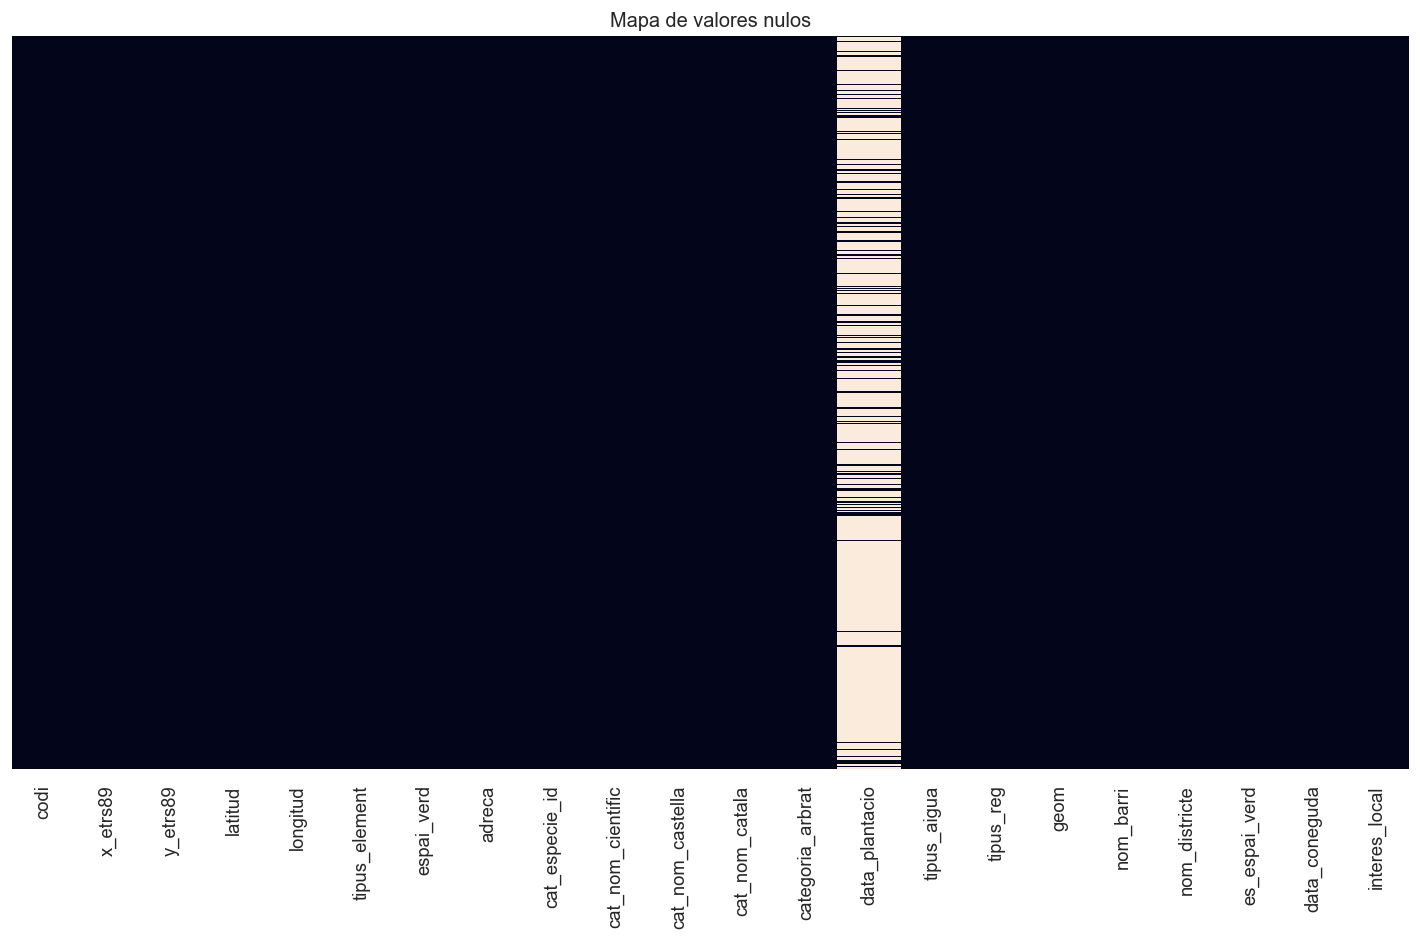

codi                      0
x_etrs89                  0
y_etrs89                  0
latitud                   0
longitud                  0
tipus_element             0
espai_verd                0
adreca                    0
cat_especie_id            0
cat_nom_cientific         0
cat_nom_castella          0
cat_nom_catala            0
categoria_arbrat          0
data_plantacio       189670
tipus_aigua               0
tipus_reg                 0
geom                      0
nom_barri                 0
nom_districte             0
es_espai_verd             0
data_coneguda             0
interes_local             0
dtype: int64


In [755]:
# Visualización de valores nulos
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Mapa de valores nulos')
plt.tight_layout()
plt.show()

print(df.isnull().sum())

## Exportación de datos

In [756]:
# Crear la carpeta 'clean' si no existe
clean_folder = r'C:\Users\carlo\Documentos\proyectos\arbrat\data\clean'
os.makedirs(clean_folder, exist_ok=True)

# Exportar el DataFrame a archivos CSV
try:
    df.to_csv(os.path.join(clean_folder, 'arbres_clean.csv'), index=False, encoding='utf-8')
except PermissionError:
    print("El archivo ya existe o está siendo utilizado. Ignorando la operación.")

## Visualización

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1117536567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_arbres, y='nom_districte', order=df_arbres['nom_districte'].value_counts().index, palette='viridis')


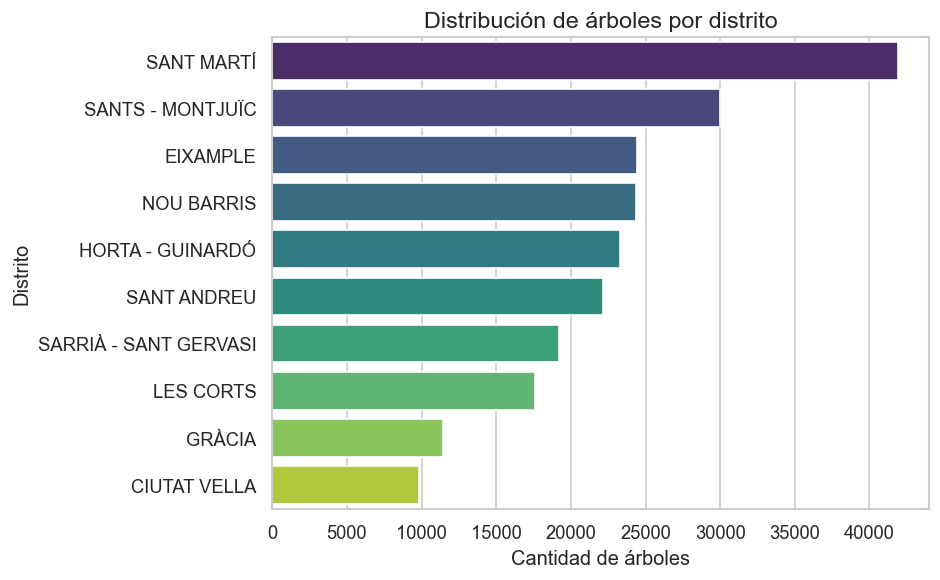

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1117536567.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_especies.values, y=top_especies.index, palette='crest')


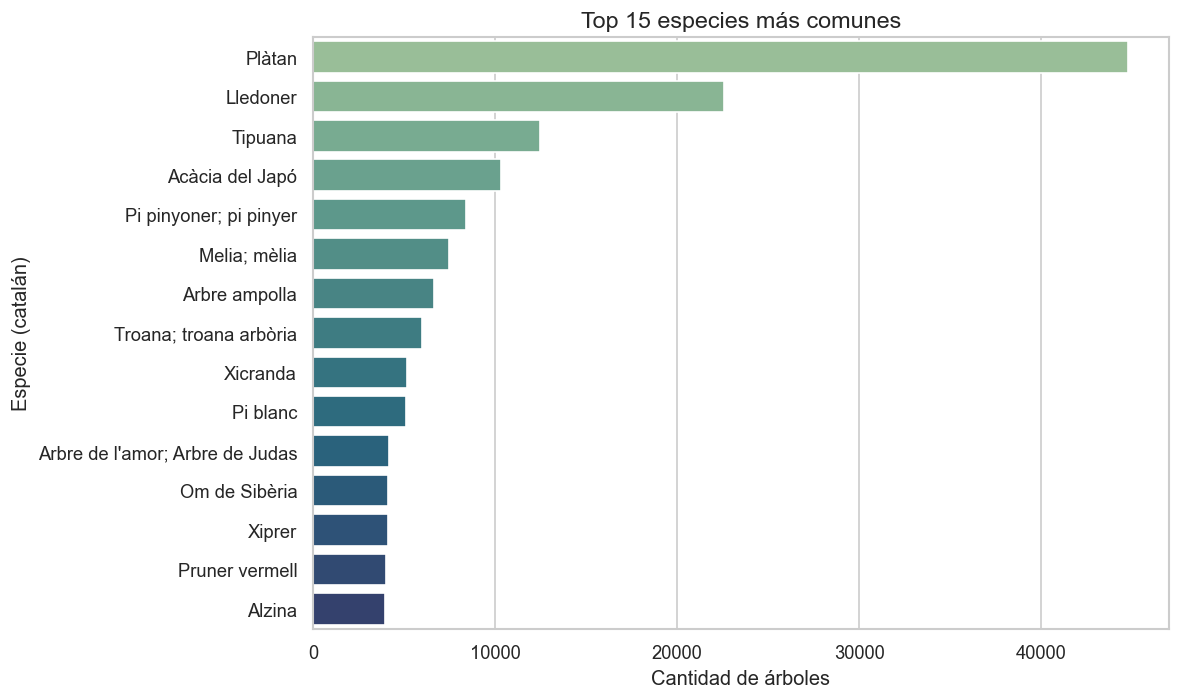

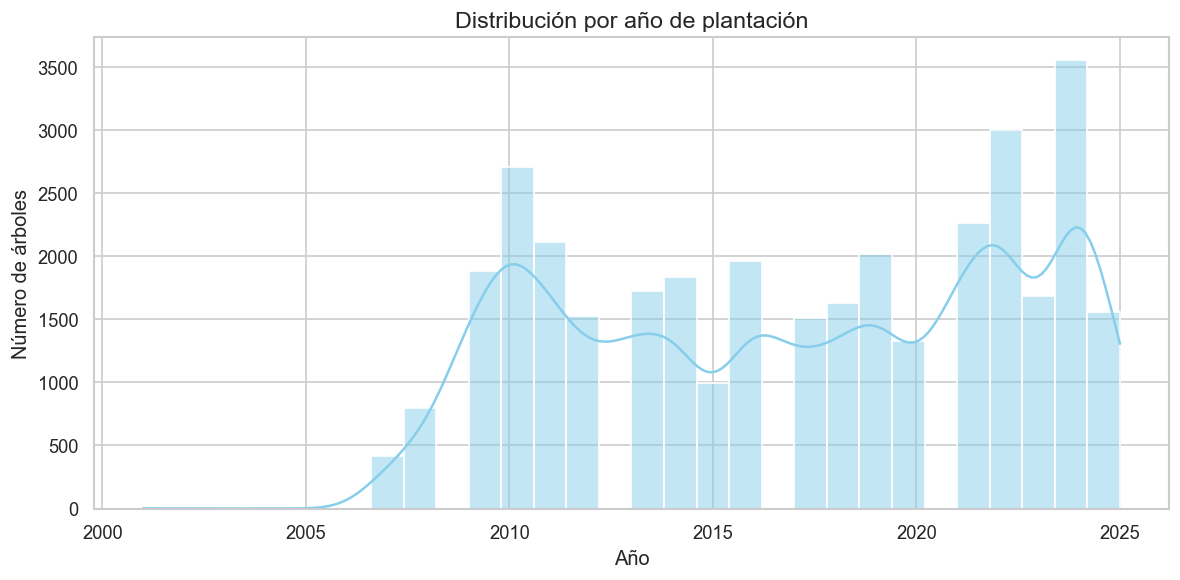

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1117536567.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_arbres, x='tipus_reg', order=df_arbres['tipus_reg'].value_counts().index, palette='pastel')


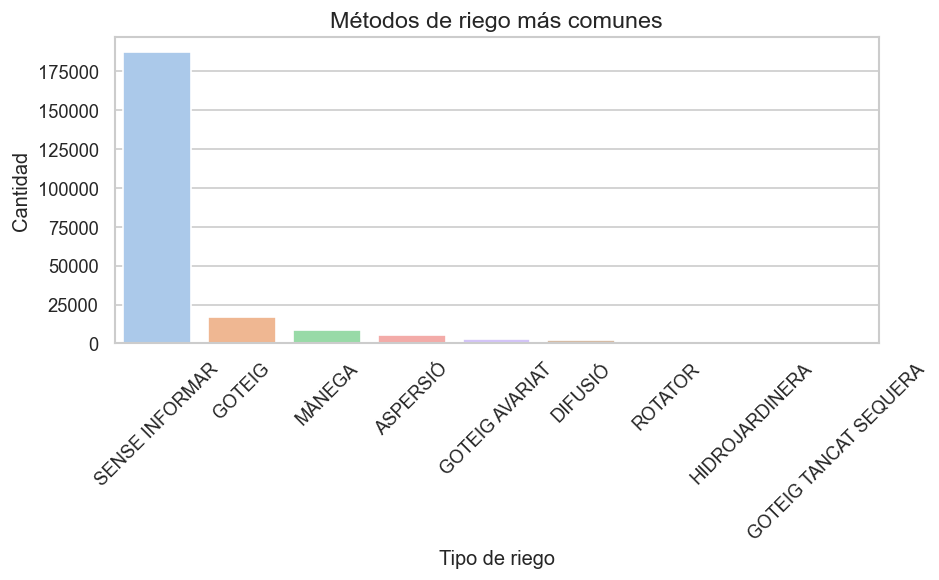

C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1117536567.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_arbres, x='categoria_arbrat', order=df_arbres['categoria_arbrat'].value_counts().index, palette='muted')


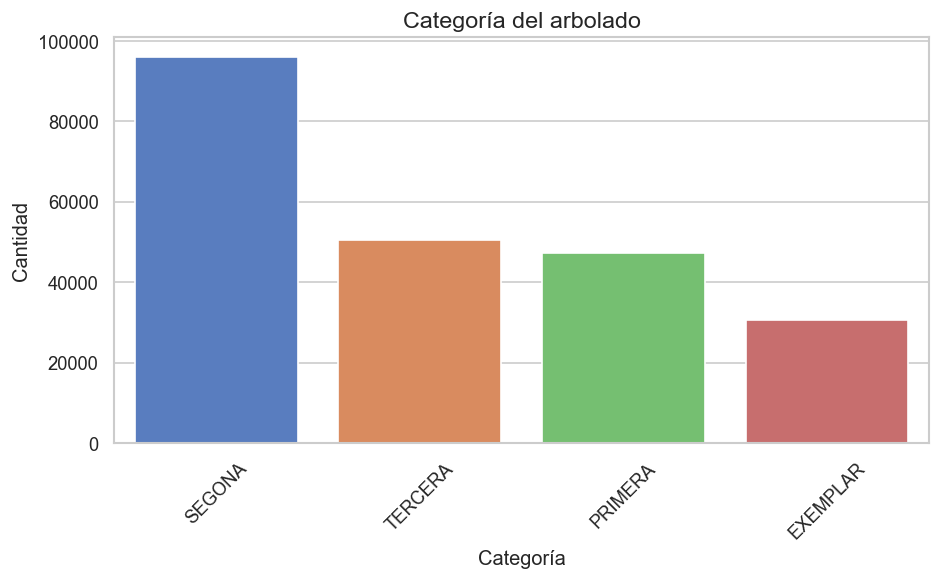

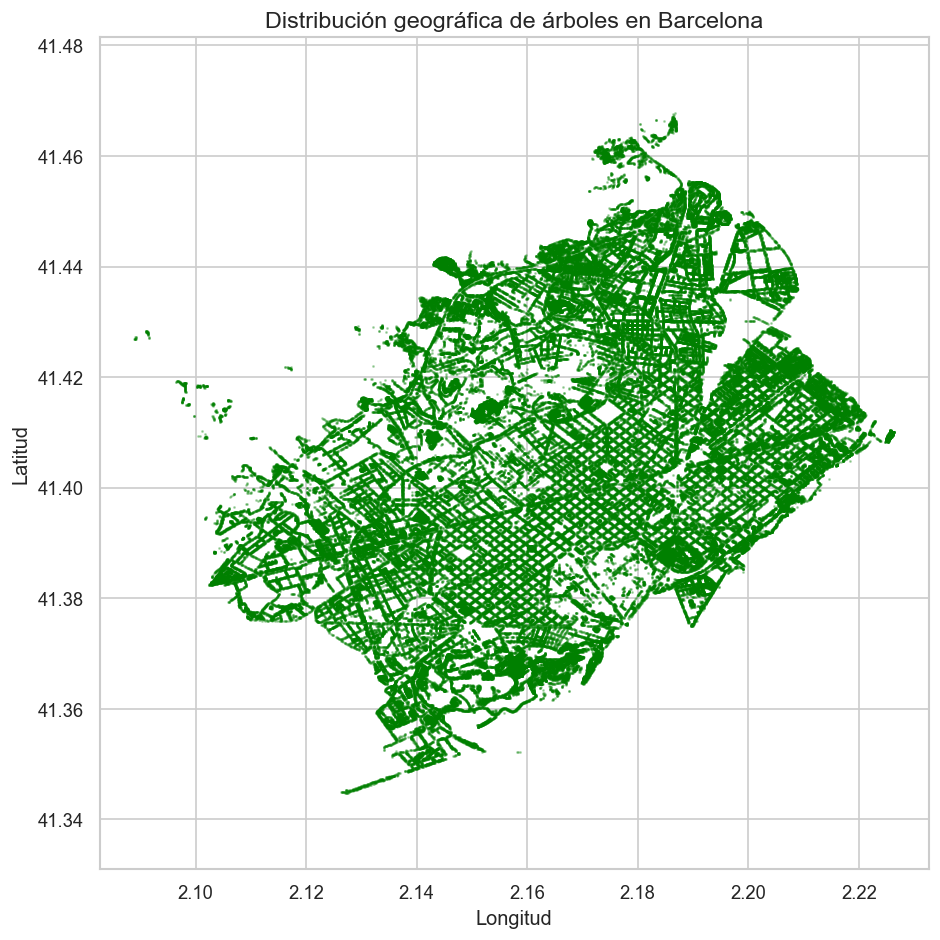

In [757]:
# Configuración de estilo
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# 1. Árboles por distrito
plt.figure(figsize=(8, 5))
sns.countplot(data=df_arbres, y='nom_districte', order=df_arbres['nom_districte'].value_counts().index, palette='viridis')
plt.title('Distribución de árboles por distrito', fontsize=14)
plt.xlabel('Cantidad de árboles')
plt.ylabel('Distrito')
plt.tight_layout()
plt.show()

# 2. Top 15 especies más comunes (nombre catalán)
top_especies = df_arbres['cat_nom_catala'].value_counts().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_especies.values, y=top_especies.index, palette='crest')
plt.title('Top 15 especies más comunes', fontsize=14)
plt.xlabel('Cantidad de árboles')
plt.ylabel('Especie (catalán)')
plt.tight_layout()
plt.show()

# 3. Distribución por año de plantación
df_arbres['data_plantacio'] = pd.to_datetime(df_arbres['data_plantacio'], errors='coerce')
df_arbres['any_plantacio'] = df_arbres['data_plantacio'].dt.year

plt.figure(figsize=(10, 5))
sns.histplot(df_arbres['any_plantacio'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribución por año de plantación', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Número de árboles')
plt.tight_layout()
plt.show()

# 4. Árboles por tipo de riego
plt.figure(figsize=(8, 5))
sns.countplot(data=df_arbres, x='tipus_reg', order=df_arbres['tipus_reg'].value_counts().index, palette='pastel')
plt.title('Métodos de riego más comunes', fontsize=14)
plt.xlabel('Tipo de riego')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Árboles por categoría
plt.figure(figsize=(8, 5))
sns.countplot(data=df_arbres, x='categoria_arbrat', order=df_arbres['categoria_arbrat'].value_counts().index, palette='muted')
plt.title('Categoría del arbolado', fontsize=14)
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Mapa básico de puntos
plt.figure(figsize=(8, 8))
plt.scatter(df_arbres['longitud'], df_arbres['latitud'], s=0.5, alpha=0.3, color='green')
plt.title('Distribución geográfica de árboles en Barcelona', fontsize=14)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\carlo\AppData\Local\Temp\ipykernel_4080\1442861992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


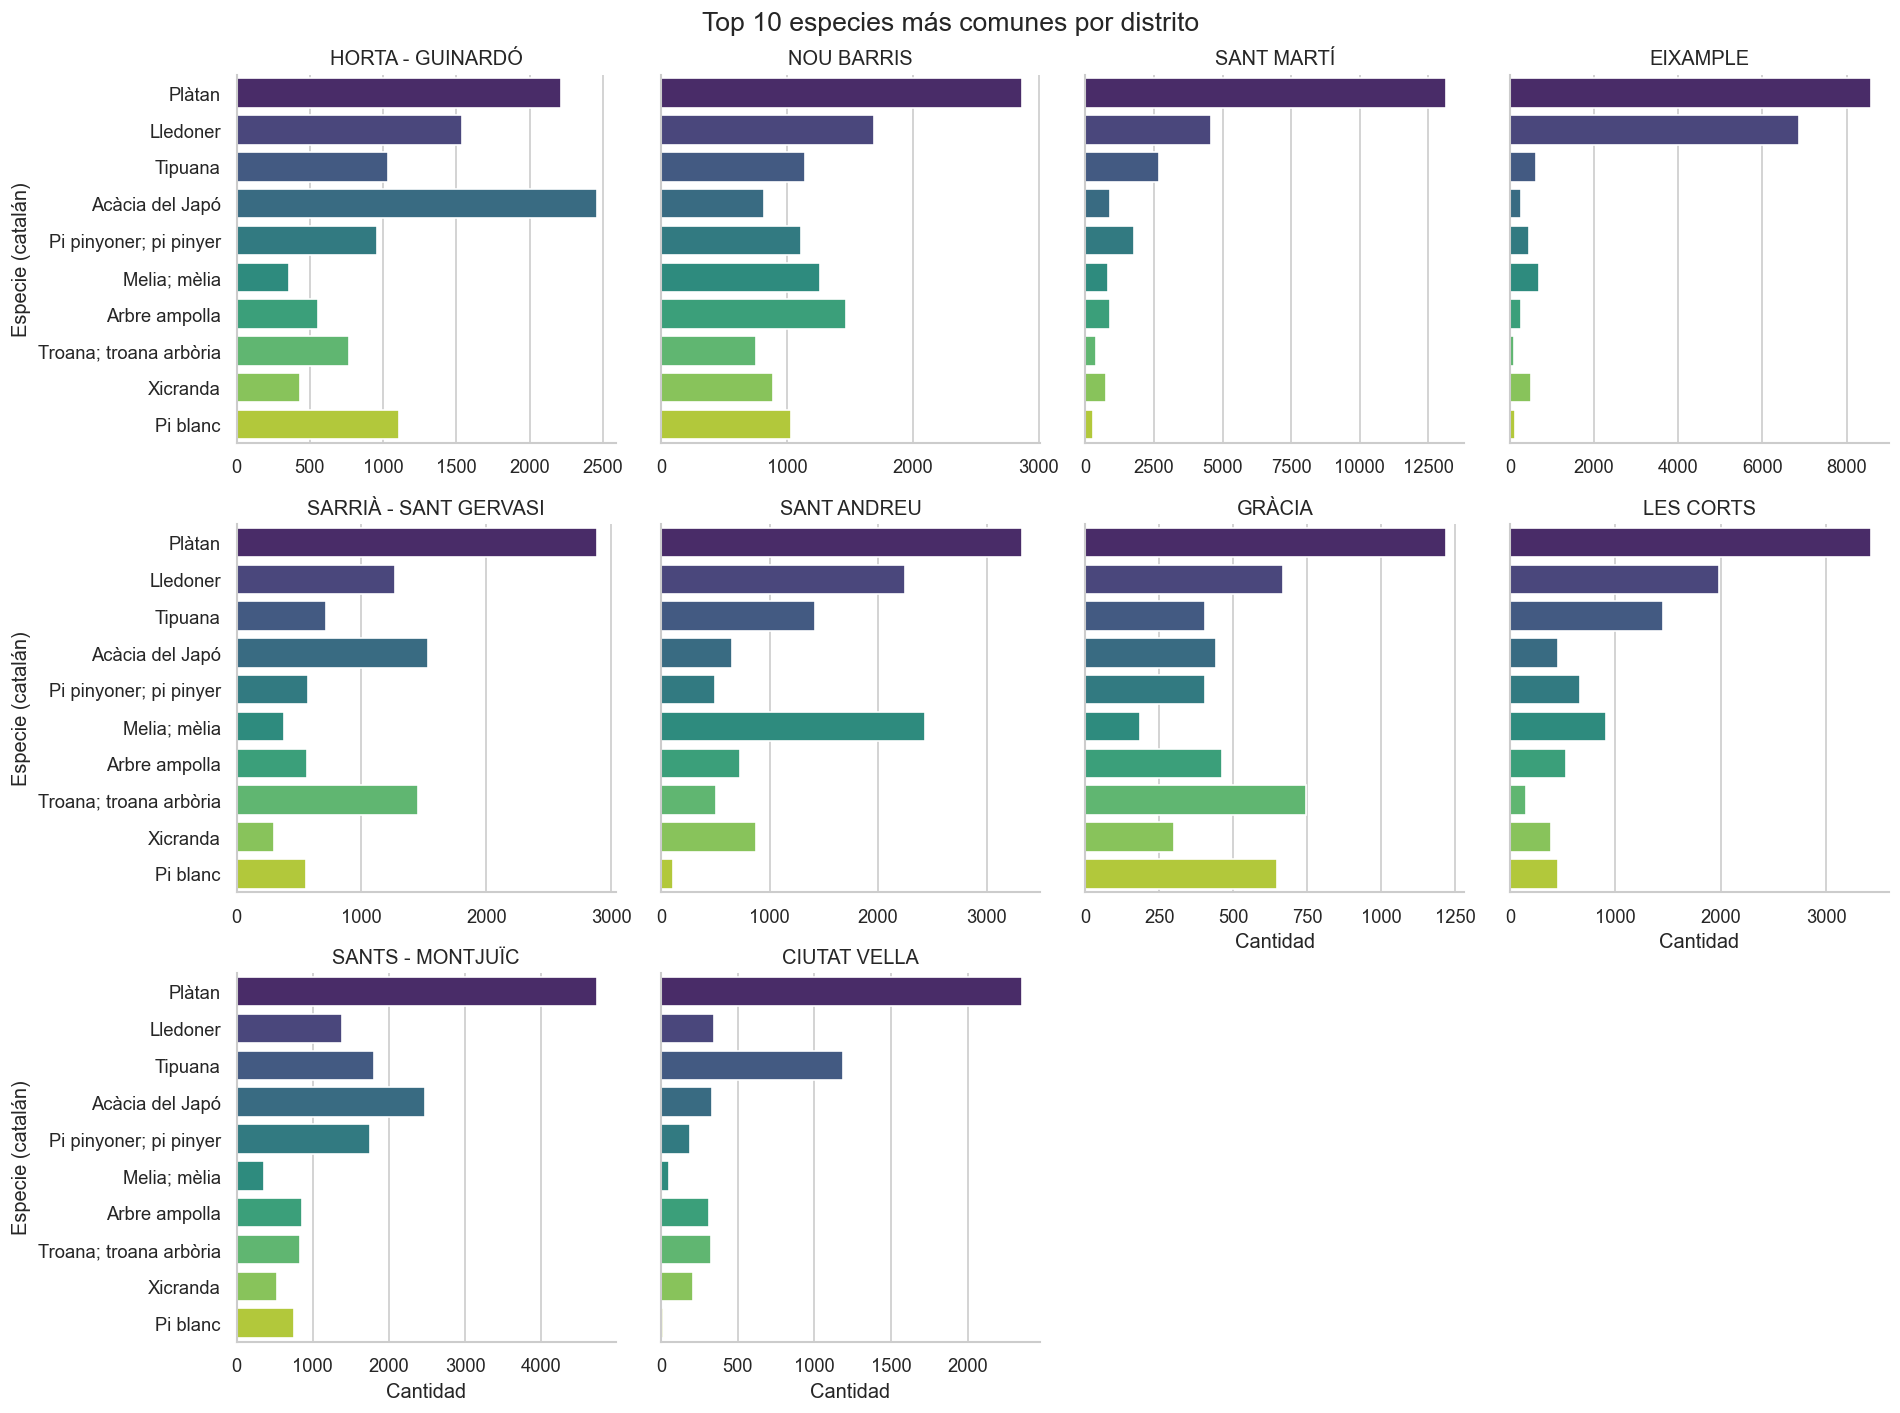

In [758]:
top_species = df_arbres['cat_nom_catala'].value_counts().nlargest(10).index
df_top = df_arbres[df_arbres['cat_nom_catala'].isin(top_species)]

g = sns.catplot(
    data=df_top,
    kind="count",
    y="cat_nom_catala",
    col="nom_districte",
    col_wrap=4,
    order=top_species,
    height=4,
    sharex=False,
    palette="viridis"
)
g.set_titles("{col_name}")
g.set_axis_labels("Cantidad", "Especie (catalán)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 especies más comunes por distrito", fontsize=16)
plt.tight_layout()
plt.show()


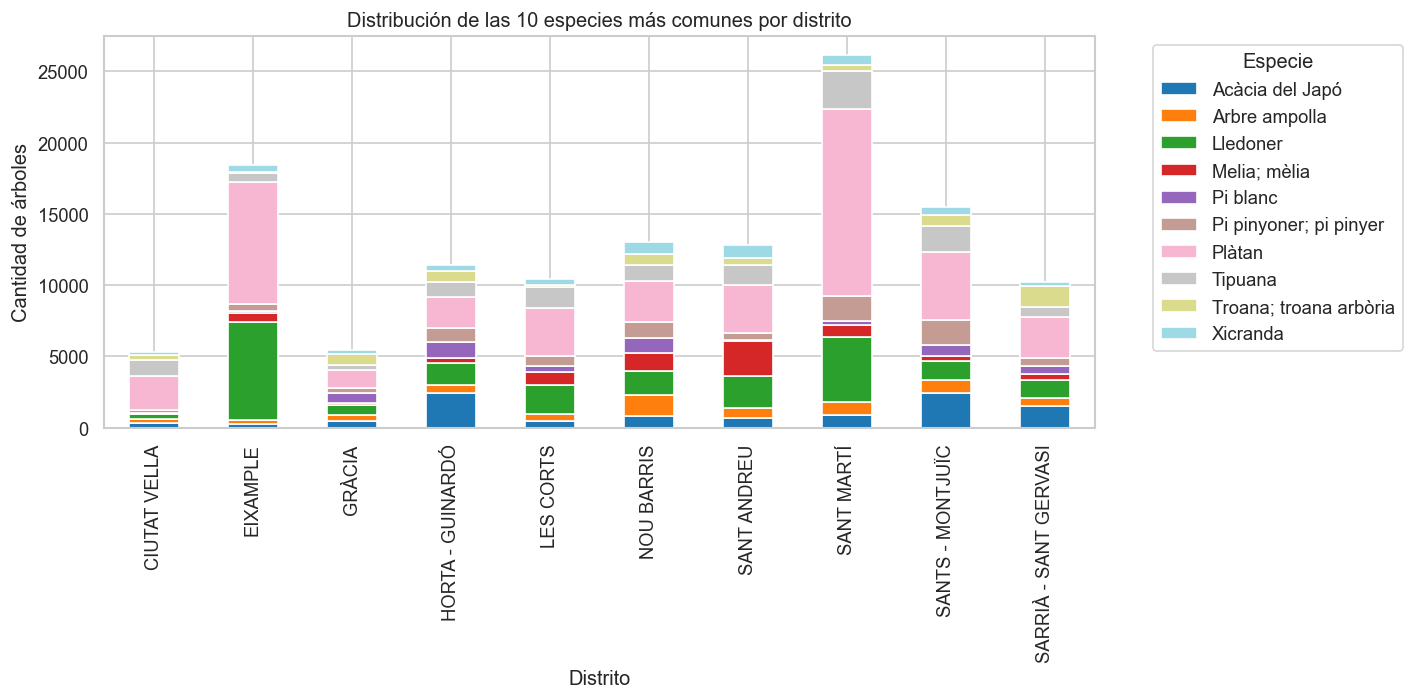

In [759]:
# Crear tabla de frecuencia
df_stack = df_arbres[df_arbres['cat_nom_catala'].isin(top_species)]
tabla = pd.crosstab(df_stack['nom_districte'], df_stack['cat_nom_catala'])

# Gráfico apilado
tabla.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Distribución de las 10 especies más comunes por distrito')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de árboles')
plt.legend(title='Especie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
